### Proof of likelihood function nonconvexity
This script identifies a situation in which the likelihood function is nonconvex. Specifically, let 

${\mathbf{D}_D} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ and $ {\mathbf{D}_I} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

Then, define our guess matrix $\widehat{D}$ to be 

$\widehat{D} = \begin{bmatrix} w & x \\ y & z \end{bmatrix}$

We can know write the likelihood function of our guess explicitly using the `sympy` package.

In [19]:
from sympy import *
var = ["w", "x","y","z"]
from IPython.display import display

w, x, y, z = symbols(" ".join(var))

# Define our likelihood function
fun = (w/(w+x)-1)**2  + (w/(w+y))**2 
fun += (x/(w+x))**2   + (x/(x+z))**2
fun += (y/(y+z))**2   + (y/(w+y)-1)**2
fun += (z/(y+z)-1)**2 + (z/(x+z))**2

# Switch to negative log-likelihood so we can minimize
fun *= 1

The Jacobian matrix of this function is really nastly looking:

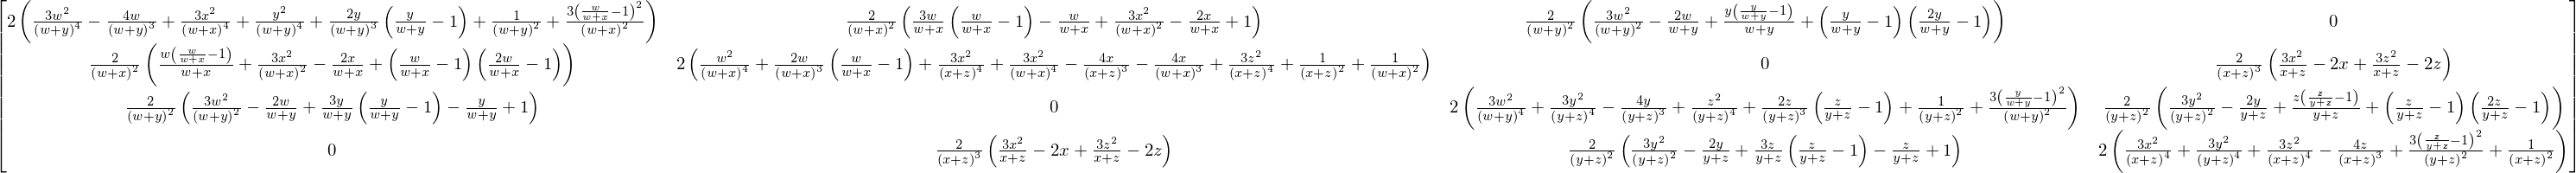

In [20]:
jac = Matrix([[fun.diff(a,b) for a in var] for b in var])
display(jac)

It doesn't appear that this matrix should be positive semidefinite for all $w, x, y, z$ combos, so we iteratively find a counterexample:

In [22]:
r = [(i+1)*0.01 for i in range(0,99)]

def search():
    for i in r:
        for j in r:
            for k in r:
                for l in r:
                    mat = jac.subs([(w,i),(x,j),(y,k),(z,l)])
                    for eig in mat.eigenvals().keys():
                        val = eig.evalf()
                        if im(val) > 0 or re(val) < 0:
                            print "Not convex! " + str(val)
                            print(i,j,k,l)
                            return
search()

Not convex! -1830.12701892219 + 2.23748904465343e-27*I
(0.01, 0.01, 0.01, 0.01)
